<div>
    <h1>Convoluties</h1>
</div>

<div>
    <h2>Wat zijn convoluties</h2>
    
    Convoluties zijn bewerkingen die worden toegepast op afbeeldingen. Door middel van convoluties kan men op zoek gaan 
    naar kenmerken van afbeeldingen. Een convolutie kan randen, schuine lijnen,... detecteren. Ook kan men ze gebruiken voor 
    aanpassingen aan contrast en voor het verminderen van ruis.
    
    De bewerking bestaat eruit de waarden van een pixel te pakken en een gewogen bewerking te maken met alle 
    omliggende waarden. Om deze bewerking uit te voeren maakt men gebruik van matrices of tensoren. De filter glijdt 
    als het ware over de afbeelding en als resultaat krijgt men een matrix met de resultaten van elke bewerking. 
    
    Het is een bewerking waarbij de elementen van de matrix onder de filter vermenigvuldigd worden met de elementen 
    van de filter. Deze producten worden opgeteld om zo een nieuwe waarde te verkrijgen. De filter doet dit op elke plaats
    en bekomt zo een nieuwe matrix. Hieronder wordt dit door een voorbeeld geïllustreerd.
</div>

<div>
        Filter: $\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1   \end{bmatrix} $.
    
    
</div>

<div>
        matrix van grijswaarden: $\begin{bmatrix} 15 & 20 & 70 \\ 40 & 100 & 115 \\ 5 & 80 & 75   \end{bmatrix} $.
    
    Dan is de nieuwe waarde die men bekomt gelijk aan: (-1)(15) + (-1)(20) + (-1)(70) + (-1)(40) + (8)*(100) + (-1)(115) + (-1)(5) + (-1)(80) + (-1)(75) = 380
    
    
</div>

<div>
    <h2>Importeren modules</h2>
    
    Elke module die we laden heeft zijn eigen toepassingen en is noodzakelijk om de convoluties goed te illustreren. 
    
    We laden numpy in omdat het in deze module gemakkelijk is om te werken met matrices. Matplotlib.pyplot gebruiken we om 
    de werking van de convolutionele filter te illustreren door de foto en de bewerkte foto weer te geven. Scipy.signal 
    gebruiken we om de convolutionele filters te kunnen toepassen op de afbeeldingen.
    
    Als extra laden we skimage.color in. Deze gebruiken we om een eigen gekozen afbeelding in kleur om te zetten naar een 
    grijswaarden afbeelding.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

import skimage.color as skc

<div>
    <h2>Gebruikte afbeeldingen en inladen van deze afbeeldingen</h2>
    
    We maken voor het inlezen van afbeeldingen gebruik van 2 belangrijke functies. plt.imread() laad de afbeelding in van 
    een bepaalde locatie en geeft een tensor terug met alle rgb waarden van de afbeelding.
    
    Daarna vormen we deze matrix met rgb waarden om tot een matrix met enkel grijswaarden. RGB duid op de basiskleuren rood, groen en blauw. Als we deze in bepaalde maten mengen kan bijna elke kleur verkregen worden. Om de grijswaarden te 
    verkrijgen gebruiken we de functie rgb2gray('afbeelding').
    
    Deze functie geeft waarden terug tussen 0 en 1 en men kan hiermee verder aan de slag gaan door telkens de maximale 
    waarde bij het weergeven met de functie imshow() in te stellen op 1. Er wordt echter meestal gekozen om deze waarden
    nog te vermenigvuldigen met 255 zodat waarden tussen 0 en 255 bekomen worden. Grijswaarden worden meestal op deze manier 
    voorgesteld.
    
    De afbeeldingen die gebruikt zijn, kan men terugvinden in de map afbeeldingen. De bronnen van deze afbeeldingen worden 
    onder aan de notebook vermeld.
</div>

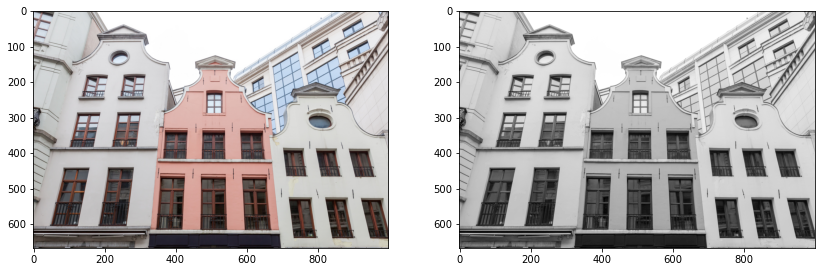

In [2]:
huizen = plt.imread("afbeeldingen/foto1.jpg")
huizen_grijs = skc.rgb2gray(huizen)*255
#het weergeven van de 2 afbeeldingen om het verschil kenbaar te maken tussen rgb en grijstinten

plt.figure(figsize=(14,12))
plt.subplot(1, 2, 1)
plt.imshow(huizen)
plt.subplot(1, 2, 2)
plt.imshow(huizen_grijs, vmin=0, vmax=255, cmap="gray")

In [3]:
# Inlezen andere afbeeldingen in gijswaarden
ijs = skc.rgb2gray(plt.imread("afbeeldingen/foto4.jpg"))*255
huidmondjes_prei = skc.rgb2gray(plt.imread("afbeeldingen/foto2.jpg"))*255
bomen = skc.rgb2gray(plt.imread("afbeeldingen/foto3.jpg"))*255

<div>
    <h2>Toepassen van convoluties</h2>
    
    In dit onderdeel zullen voorbeelden van verschillende convolutionele filters aangehaald worden. Er zal ook besproken 
    wat deze filters exact weergegeven om een beter inzicht te krijgen in convolutionele filters. Om de filters toe te 
    passen maken we gebruik van de functie convolve2d(a, b) met als a de afbeelding in grijswaarden en als b 
    de convolutionele filter met dimensie 3x3
</div>

<div>
    <h3> Randen </h3>
</div>

Bijvoorbeeld om randen weer te geven gebruikt men deze filter: $\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1   \end{bmatrix} $. <br>

De waarden van deze filters worden afhankelijk van de soort van foto lichtjes aangepast om een geschikt resultaat te krijgen

In [4]:
rand_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) #filter invoegen
print(rand_filter)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


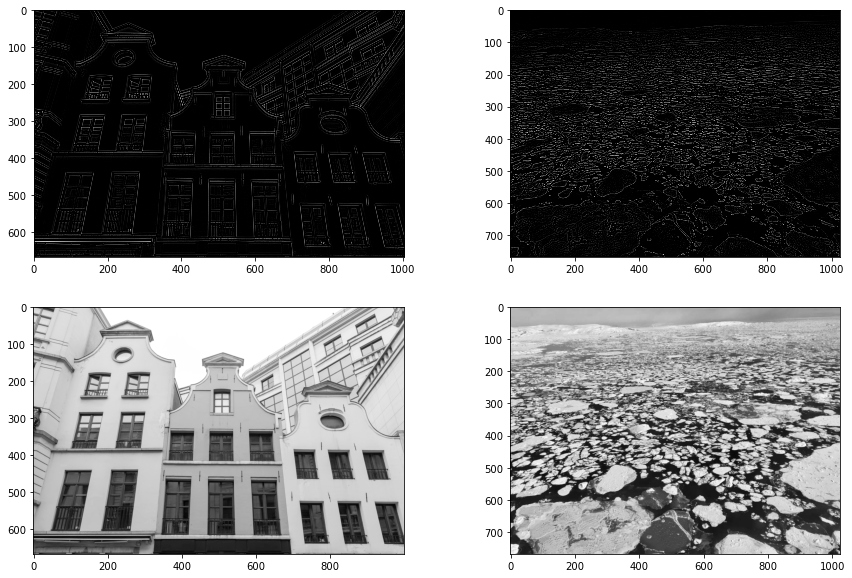

In [5]:
ijs_randen = scipy.signal.convolve2d(ijs, rand_filter)
huizen_randen = scipy.signal.convolve2d(huizen_grijs, rand_filter)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(huizen_randen, vmin=0, vmax=255, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(ijs_randen, vmin=0 , vmax=255, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(huizen_grijs, vmin=0, vmax=255, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(ijs, vmin=0, vmax=255, cmap='gray')

<h4> Een tweede randfilter </h4>

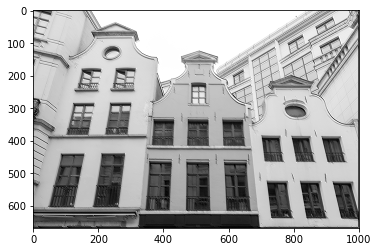

In [6]:
rand_filter2 = np.array([[2, 0, -1], [0, 0, 0], [-1, 0, 1]])
huizen_randen2 = scipy.signal.convolve2d(huizen_grijs, rand_filter2)
plt.imshow(huizen_randen2, vmin=0, vmax=255, cmap='gray')

<div>
    <h3>Schuine lijnen</h3>
</div>

Om schuine lijnen weer te geven gebruikt men bijvoorbeeld de filter: $\begin{bmatrix} -6 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 6   \end{bmatrix} $. 

In [7]:
schuin_filter = np.array([[-6, 0, 0], [0, 0, 0], [0, 0, 6]])
print(schuin_filter)

[[-6  0  0]
 [ 0  0  0]
 [ 0  0  6]]


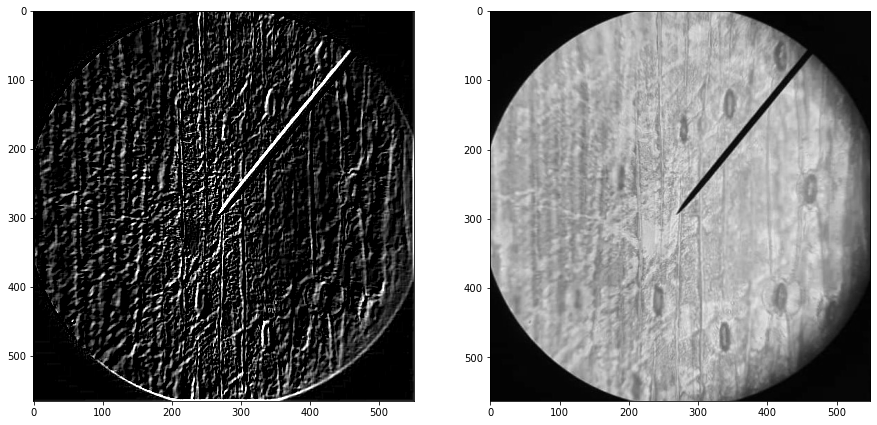

In [8]:
huidmondjes_schuin = scipy.signal.convolve2d(huidmondjes_prei, schuin_filter)
plt.figure(figsize=(15,18))
plt.subplot(1, 2, 1)
plt.imshow(huidmondjes_schuin, vmin=0, vmax= 255, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(huidmondjes_prei, vmin=0, vmax =255, cmap="gray")

<h4> Een tweede filter voor schuine lijnen is: </h4> <br>
$\begin{bmatrix} 1 & 1 & 1 \\ -1 & -2 & 1 \\ -1 & -1 & 1   \end{bmatrix} $. 

[[ 1  1  1]
 [-1 -2  1]
 [-1 -1  1]]


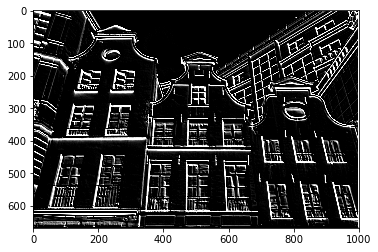

In [9]:
schuin_filter2 = np.array([[1,1,1], [-1,-2,1], [-1,-1,1]])
print(schuin_filter2)
huizen_45graden = scipy.signal.convolve2d(huizen_grijs, schuin_filter2)
plt.imshow(huizen_45graden, vmin=0, vmax=50, cmap="gray")

<div>
    <h3>Verticale lijnen</h3> <br>
    $\begin{bmatrix} -2 & 0 & 2 \\ -2 & 0 & 2 \\ -2 & 0 & 2 \end{bmatrix}$.
</div>

[[-2  0  2]
 [-2  0  2]
 [-2  0  2]]


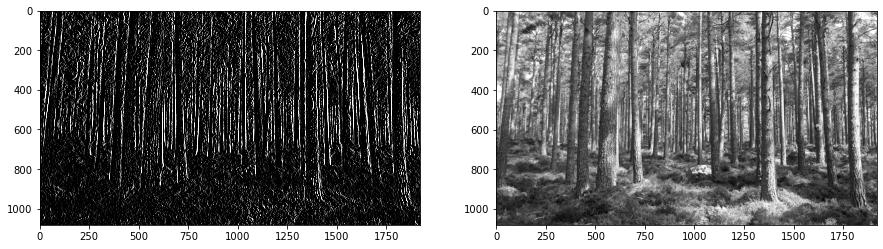

In [10]:
verticaal_filter = np.array([[-2, 0, 2], [-2, 0, 2], [-2, 0, 2]])
print(verticaal_filter)
bomen_verticaal = scipy.signal.convolve2d(bomen, verticaal_filter)
plt.figure(figsize=(15, 18))
plt.subplot(1, 2, 1)
plt.imshow(bomen_verticaal, vmin=0 , vmax=255, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(bomen, vmin=0, vmax=255, cmap='gray')

<div>
    <h3>Emboss</h3>
    
    Emboss gebruikt men voor het creëren van een 3d-effect op de foto
</div>

[[-5 -2  0]
 [-1  1  1]
 [ 0  2  5]]


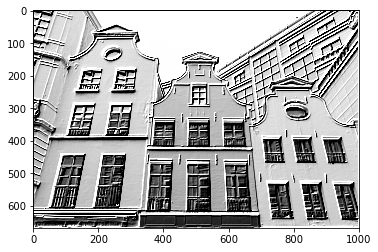

In [11]:
emboss = np.array([[-5, -2, 0], [-1, 1, 1], [0, 2, 5]])
print(emboss)
huizen_emboss = scipy.signal.convolve2d(huizen_grijs, emboss)
plt.imshow(huizen_emboss, vmin=0, vmax=255, cmap="gray")

<h3> Gaussian Blur </h3>

Zoals hieronder ook duidelijk wordt werkt niet elke filter even goed op elke foto en merkt men soms slechts een heel klein verschil met de originele foto

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


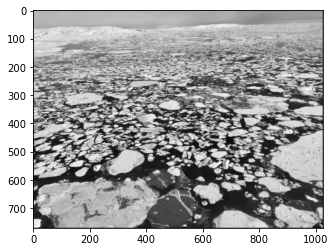

In [12]:
filter_gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16  
print(filter_gaussian)
ijs_gaussian = scipy.signal.convolve2d(ijs, filter_gaussian)
plt.imshow(ijs_gaussian, vmin=0, vmax=255, cmap="gray")

[[-1 -2 -1]
 [-1 12 -2]
 [-1 -2 -1]]


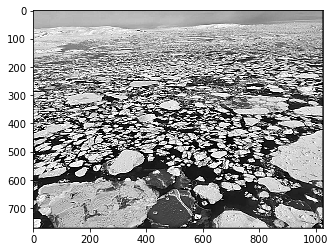

In [13]:
verschil_origineel_en_gaussian_blur = np.array([[-1, -2, -1], [-1, 12, -2], [-1, -2, -1]])
print(verschil_origineel_en_gaussian_blur)
ijs_verschil_origineel_en_gaussian_blur = scipy.signal.convolve2d(ijs, verschil_origineel_en_gaussian_blur)
plt.imshow(ijs_verschil_origineel_en_gaussian_blur, vmin=0, vmax=255, cmap="gray")

<h3> Sobel </h3>

De filer sobel is weer een filter die de randen in een foto benadrukt. Hieronder worden 2 voorbeelden van een sobelfilter getoond.

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


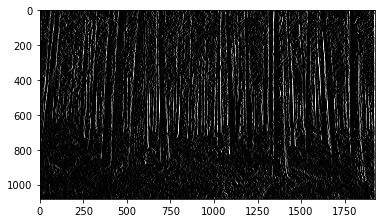

In [14]:
filtersobel1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(filtersobel1)
sobel1 = scipy.signal.convolve2d(bomen, filtersobel1)
plt.imshow(sobel1, vmin=0 , vmax=255, cmap="gray")

[[ 2  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


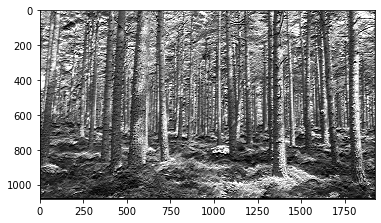

In [15]:
filtersobel2 = np.array([[2, 2, 1], [0, 0, 0], [-1, -2, -1]])
print(filtersobel2)
sobel2 = scipy.signal.convolve2d(bomen, filtersobel2)
plt.imshow(sobel2, vmin=0, vmax=255, cmap="gray")

<h2>Referenties</h2>

<h4>Foto's:</h4>
<br> [1] Foto Brusselse huizen geraadpleegd op 11 november 2020 via https://www.paesionline.it/belgio/foto-immagini-bruxelles/2438465_art_nouveau. <br> [2] Foto ijs geraadpleegd op 11 november 2020 via https://www.scientias.nl/omvang-van-het-zee-ijs-op-de-noordpool-is-ietsje-meer-dan-de-afgelopen-jaren/. <br> [3] Foto bomen geraadpleegd op 11 november 2020 via https://cpasmoi.fr/8527/tout-savoir-sur-le-bts-gestion-et-protection-de-la-nature/. <br> [4] Foto huidmondjes uit eigen onderzoek gedurende het project iPlant